In [4]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def tanh(x):
    return np.tanh(x)


def relu(x):
    return max(0, x)


def activation_function(x):
    return sigmoid(x)


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return activation_function(total)


class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1


network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x))


0.8151036049051821


In [5]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def tanh(x):
    return np.tanh(x)


def relu(x):
    return max(0, x)


def activation_function(x):
    return sigmoid(x)


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return activation_function(total)


class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2


network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))


(0.8757270529783324, 0.8757270529783324)


Dataset Sizes:  (1797, 64) (1797,)
Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test accuracy: 0.983
Training accuracy: 1.000


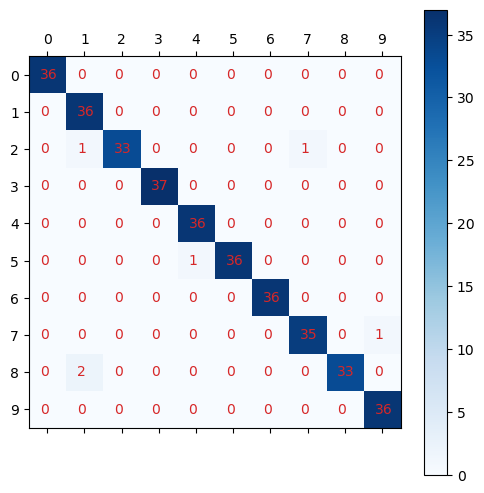

Loss:  0.003472868499418062
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Run:  125
Name of Output Layer Activation Function:  softmax
----------------------------------------------
Dataset Sizes:  (506, 13) (506,)
Train/Test Sizes:  (404, 13) (102, 13) (404,) (102,)
[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 Score: 0.462
Training R^2 Score: 0.510
Loss:  28.538174061119594
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Run:  130
Name of Output Layer Activation Function:  identity


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_test, y_preds):
    conf_mat = confusion_matrix(y_test, y_preds)
    fig = plt.figure(figsize=(6, 6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j, i]), color='tab:red')
    plt.show()

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print("Dataset Sizes: ", X_digits.shape, Y_digits.shape)
x_train, x_test, y_train, y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20,
                                                    stratify=Y_digits, random_state=123)
print("Train/Test Sizes: ", x_train.shape, x_test.shape, y_train.shape, y_test.shape)
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(x_train, y_train)
y_preds = mlp_classifier.predict(x_test)
print(y_preds[:15])
print(y_test[:15])
print("Test accuracy: %.3f" % mlp_classifier.score(x_test, y_test))
print("Training accuracy: %.3f" % mlp_classifier.score(x_train, y_train))
plot_confusion_matrix(y_test, mlp_classifier.predict(x_test))
print("Loss: ", mlp_classifier.loss_)
print("Number of Coefs: ", len(mlp_classifier.coefs_))
print("Number of Intercepts: ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Run: ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_)

print('----------------------------------------------')

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
X_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y_boston = raw_df.values[1::2, 2]
print("Dataset Sizes: ", X_boston.shape, Y_boston.shape)
x_train, x_test, y_train, y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20,
                                                    random_state=123)
print("Train/Test Sizes: ", x_train.shape, x_test.shape, y_train.shape, y_test.shape)
mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(x_train, y_train)
y_preds = mlp_regressor.predict(x_test)
print(y_preds[:10])
print(y_test[:10])
print("Test R^2 Score: %.3f" % mlp_regressor.score(x_test, y_test))
print("Training R^2 Score: %.3f" % mlp_regressor.score(x_train, y_train))
print("Loss: ", mlp_regressor.loss_)
print("Number of Coefs: ", len(mlp_regressor.coefs_))
print("Number of Intercepts: ", len(mlp_regressor.intercepts_))
print("Number of Iterations for Which Estimator Run: ", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_regressor.out_activation_)
